# U1S1

#### Day 1 - Loading and EDA

- pd.read_csv('string')  # filename or URL
- df.isnull().sum()
- df.describe(include='all') # number, by dtype, exclude
- df[col].value_counts(dropna=False)
- df = df.replace({" ?": np.NaN})
- pd.crosstab()
- df.plot(kind=, stacked=, etc)
- sns.pairplot() ----- big matrix of graphs
- matplotlib.style.use() , style.available

#### Day 2 - Feature Engineering

### Links
JakeVDP - Python Data Science Handbook

- [Chapter 1.5](https://jakevdp.github.io/PythonDataScienceHandbook/01.05-ipython-and-shell-commands.html), Ipython, Shell Commands
- [Chapter 3.10](https://jakevdp.github.io/PythonDataScienceHandbook/03.10-working-with-strings.html), Vectorized String Operations
- [Chapter 3.11](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html), Working with Time Series

[Minimally Sufficient Pandas](https://medium.com/dunder-data/minimally-sufficient-pandas-a8e67f2a2428)

[Exploratory notebook from a kaggle comp](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart)
- Excellent use of Matplotlib, Seaborn. Will make great code templates
- Dataframe merges

[Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](https://medium.com/kaggle-blog/instacart-market-basket-analysis-feda2700cded)
- Refer to this for feature engineering inspiration

In [ ]:
# Display an image

from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

# Loading Data, EDA

In [60]:
# curl prints contents without loading
#
# !curl https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data

In [ ]:
# wget gets whatever is at the URL and reads it into memory
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
# in this case it's a CSV that needs unzipped
!unzip LoanStats_2018Q4.csv.zip
# sometimes it's in a super-compressed filetype called a tarball
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz
# You can navigate file hierarchies like a shell
%cd instacart_2017_05_01
!ls -lh *.csv # "long ls of anything ending with .csv"

# You can also read the raw contents of the file
!head LoanStats_2018Q4.csv
!tail LoanStats_2018Q4.csv



In [61]:
# Get documentation
#
# ?pd.read_csv()
# help(pd.read_csv)

In [3]:
import pandas as pd

# Load via URL
# flag_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data'
# df = pd.read_csv(flag_data_url)

# Or load from file (Colab)
#
# from google.colab import files
# uploaded = files.upload()
# df = pd.read_csv('flag (1).data', names=column_headers)


# Fix header/footer problems

# Fix headers yourself
# column_headers = ['name', 'landmass', 'zone', 'area', 'population', 'language', 
#                   'religion', 'bars', 'stripes', 'colours', 'red', 'green', 
#                   'blue', 'gold', 'white', 'black', 'orange', 'mainhue', 
#                   'circles', 'crosses', 'saltires', 'quarters', 'sunstars', 
#                   'crescent', 'triangle', 'icon', 'animate', 'text', 'topleft', 
#                   'botright']
# df = pd.read_csv(flag_data_url, names=column_headers)


# Or specify header row
#
# df = pd.read_csv(flag_data_url, header=None)
# df = pd.read_csv('LoanStats_2018Q4.csv', header=1)

In [ ]:
# Default C engine doesn't support skipfooter.
# Can use slower python engine.

# df = pd.read_csv('LoanStats_2018Q4.csv', header=1, skipfooter=2, engine='python')

In [ ]:
# Basic Pandas

# df.shape
# df.dtypes
# df.head()
# df.tail()

# df.describe()
    # df.describe(exclude='number')
    # df.describe(include='all')     <-- select by dtype

# df[].value_counts(dropna=False, ascending=False)   <-- keeps NaNs

# Work with NaNs
#
# df.isnull().sum().sort_values()
# df.fillna()
# df.dropna()
# df = df.replace({" ?": np.NaN})


# Drop columns
#
# df.drop()
# df = df.drop(['job', 'member_id'], axis=1)

# Group by column
#
# df.groupby('col')
#
### And you can group within that group ###
#
# df.groupby(['col1', 'col2'])
#
# df.get_group('Boston Celtics')
#
### Get the first value within each group
#
# df.first()


# Filter by condition
#
# condition = (df['c'] > 8)
# df[condition]
#
# or 
# df[df['c'] > 8]
#
# compound conditions -->  (df['user_id'] == 1) & (df['order_number'] <= 2)
#
# .isin()
# products_subset = products['product_id'].isin(orders_and_products['product_id'])


# Reorder columns
#
# final = final[['user_id', 'order_id', 'order_number', 'order_dow', 
#               'order_hour_of_day', 'add_to_cart_order', 'product_id', 
#               'product_name']]

# Sort rows
#
# final = final.sort_values(by=['order_number', 'add_to_cart_order'])
# final


# Change things about headers with a list comprehension
#
# final.columns = [column.replace('_', ' ') for column in final]

# Get a list of column names 
#
# final.columns.to_list()


In [6]:
# Viz

# df['education-num'].value_counts().sort_index().plot();
# df['age'].hist(bins=72);
# df.plot.scatter('age', 'hours-per-week');
# df['age'].plot.kde();
# df['age'].plot.density();

# Seaborn
#
# sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy1, height=2);

In [7]:
# Crosstab - categorical variables

# pd.crosstab(df['education'], df['sex'])

# Or save to variable
#
# table = pd.crosstab(df['education'], df['sex'])
# table


# Plot
#
# table.plot();
# table.plot.bar();
# table.plot(kind='bar', stacked='true');
# pd.crosstab(df['education'], df['sex']).plot(kind='bar', stacked='true');


## Day 2 - Feature Engineering

Creating new columns that hopefully contain additional information

In [ ]:
# Pandas Display Options
# pd.set_option('display.max_rows', 100)
# pd.set_option('display.max_columns', 100)


In [14]:
# Create new column from scratch
# 
# df[new_col] = df[col].apply(func)


# You can use .apply() with any function that
# works on an individual cell


# It's the same as this:
#
# def func():
#
# new_list = []
#
# for cell in df[col]:
#   new_list.append(func(cell))
#
# df[new_col] = pd.Series(new_list)


# Fun example reformats string cells
import numpy as np

examples = ['owner', 'SupeRVISOr', ' Project Manager', np.NaN]

def clean_title(job_title):
  if isinstance(job_title, str):
    return job_title.title().strip()
  else:
    return "Unknown"

for title in examples:
  print(clean_title(title))

[clean_title(title) for title in examples]

# Then
#
# df['title'] = df['title'].apply(clean_title)

Owner
Supervisor
Project Manager
Unknown


['Owner', 'Supervisor', 'Project Manager', 'Unknown']

In [ ]:
# Number of unique entries in a column
#
# len(df[col].value_counts())

In [ ]:
# Access certain column names
#
# [col for col in df if col.endswith('_d')]

[Use loc and iloc to work w slices of df](https://www.geeksforgeeks.org/difference-between-loc-and-iloc-in-pandas-dataframe/?ref=rp)

 Ex: update so that all cars made before 2015 get 22mpg
 
 
 ##### df.loc[(df.Year < 2015), ['Mileage']] = 22 
 -
 
 I think this also works
 
 ##### df['Mileage'][df.Year < 2015] = 22

### Work with Dates 

- [to_datetime](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)
- [Time/Date Components](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-date-components) "You can access these properties via the `.dt` accessor"


In [15]:
# Convert to datetime
#
# df[] = pd.to_datetime(df[], infer_datetime_format=True)

# Access the year
#
# df[].dt.year

# New column just the year
# df['year'] = df['date'].dt.year

# You can also do math on datetime columns

## Day 3 - Join and Reshape Data

- concatenate and merge data with pandas
- tidy data formatting
- `.melt()` and `.pivot()` to translate between wide and tidy 

Helpful Links:
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data - Wikipedia](https://en.wikipedia.org/wiki/Tidy_data)
- Python Data Science Handbook - JakeVDP
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
 
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

### Concatenate

In [ ]:
# Concatenate (rows by default (axis=0))

# Pass in the list of df's
cat_by_rows = pd.concat([df1, df2])
# Reset index so we don't have repeated rows
cat_by_rows = cat_by_rows.reset_index()

# Or by cols
cat_by_cols = pd.concat([df1, df2], axis=1)


# NaNs are added wherever things don't match up
# i.e. if you're going by rows and not all the column headers match

### Merge

In [ ]:
# on  = the col to merge on
# how = what to do w non-matching rows. 
#                                 inner=keep
#                                 outer=drop
#                                 right=keep only from right
#                                 left=keep only from left

new_df = pd.merge(df1,
                  df2,
                  on='column4',
                  how='inner')


# merge multiple
merged = (orders[['order_id', 'order_hour_of_day']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(products[['product_id', 'product_name']]))

## Tidy or Wide - Melt/Pivot


### Why?

Some libraries prefer data in different formats

For example, Seaborn prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data. The rules are simple:
> - Each variable is a column
> - Each observation is a row

Think backwards from the plot you want to draw -- a "variable" will be something that's assigned a role in the plot

[Hadley Wickham examples](http://vita.had.co.nz/papers/tidy-data.html)

Demonstration:

In [8]:
# build a df from scratch

%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

# transpose it
table2 = table1.T
table2

# Or make it tidy (a row should be person, treatment, value)

table1 = table1.reset_index() # to make names a column, not just the index

tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy1

# rename the columns

tidy1 = tidy1.rename(columns={'index': 'name', 
                              'variable': 'trt', 
                              'value': 'result' 
                              })
tidy1

# Or replace any text within the df

tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [9]:
# send it back - pivot_table()

# index: the unique identifier
# columns: what you want to differentiate columns by
# values: numbers go in the middle in wide mode

wide = tidy1.pivot_table(index='name', columns='trt', values='result')
wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


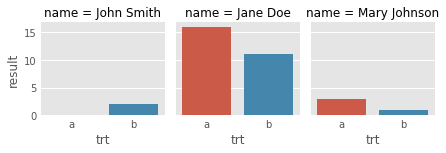

In [13]:
# Seaborn can make separate bar charts that show how well each treatment
# performed on a single person

import seaborn as sns
from matplotlib import style
style.use('ggplot')

sns.catplot(x='trt', y='result', col='name', kind='bar', data=tidy1, height=2);